In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [35]:
# Let's read the dataset and store it a variable housing_data.
housing_data = pd.read_csv('./housing.csv')

## Exploratory Data Analysis

In [36]:
# Let's get the total number of rows and columns in our dataset.
housing_data.shape

(20640, 10)

In [37]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [38]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [40]:
housing_data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [41]:
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

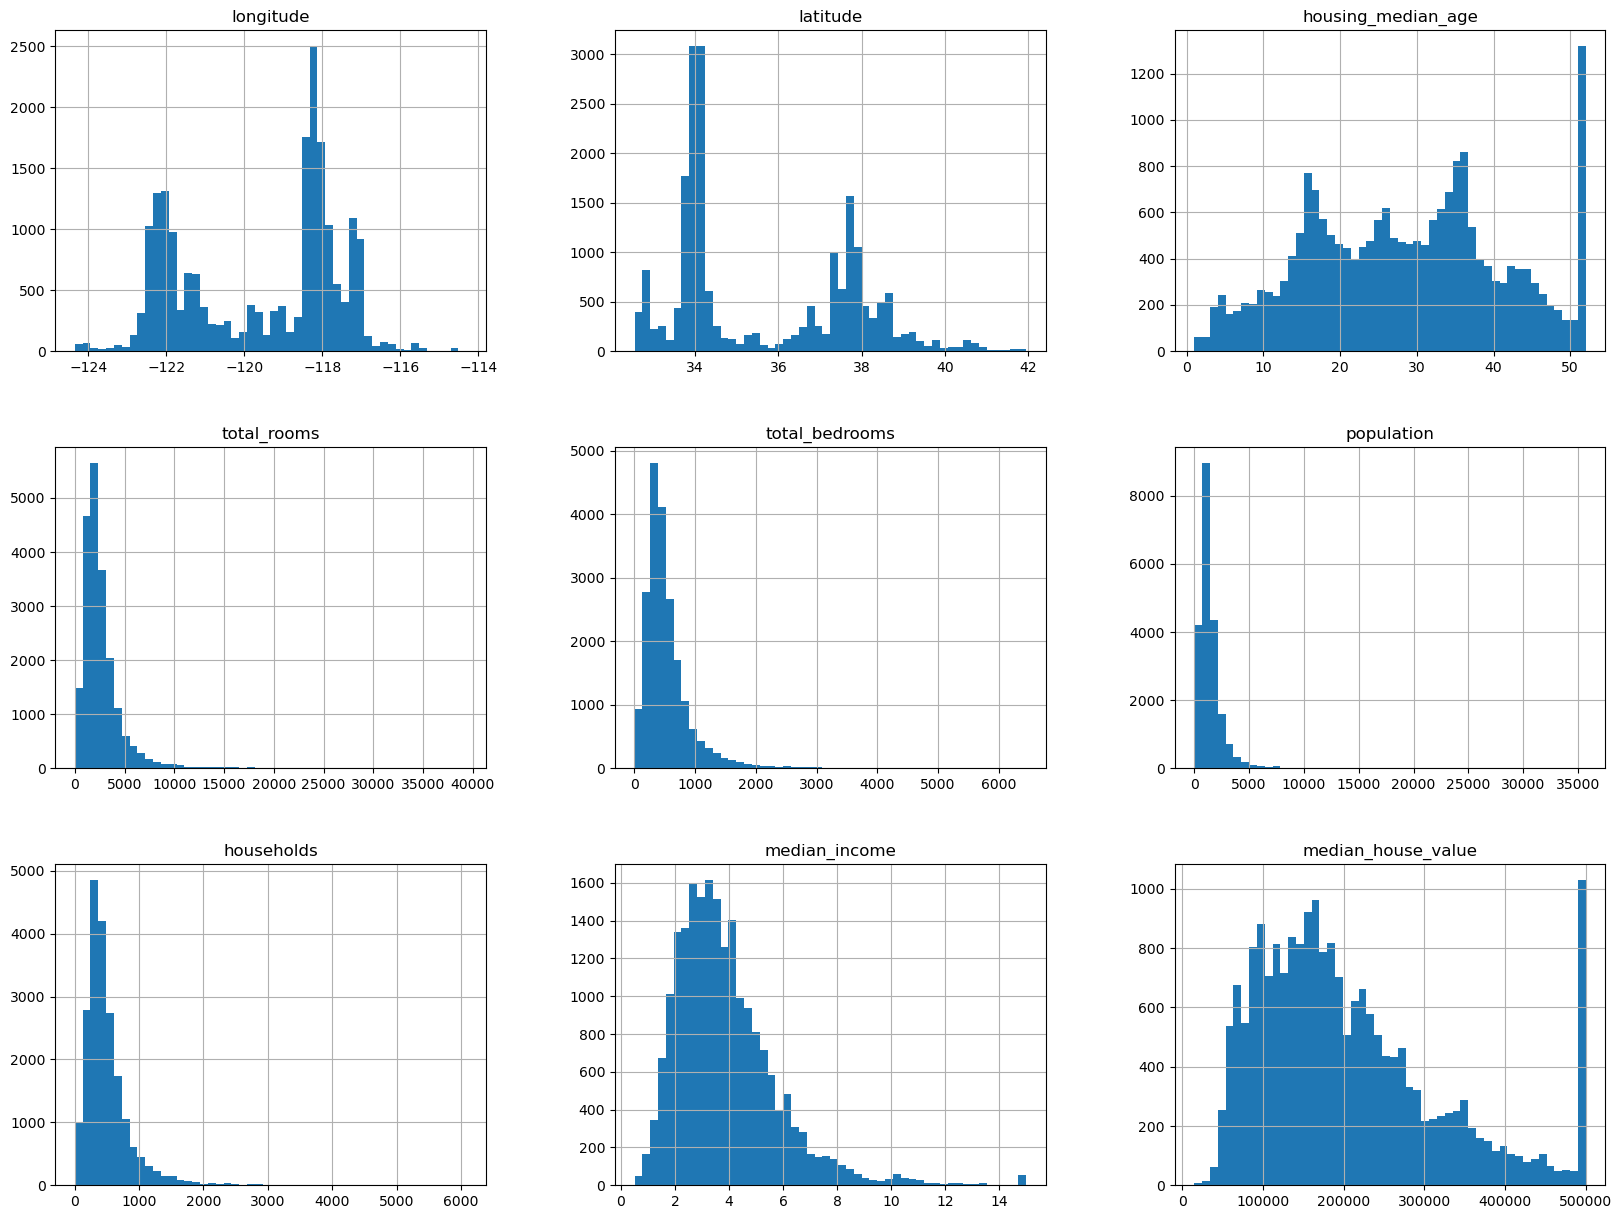

In [42]:
hist = housing_data.hist(bins=50, figsize=(20,15))
plt.show()

In [43]:
housing_data[housing_data['housing_median_age'] > 50]['housing_median_age'].value_counts()

housing_median_age
52.0    1273
51.0      48
Name: count, dtype: int64

In [44]:
housing_data.drop(housing_data[housing_data['housing_median_age'] > 51].index, inplace=True)

In [45]:
housing_data[housing_data['median_house_value'] >= 500000]['median_house_value'].value_counts()

median_house_value
500001.0    795
500000.0     17
Name: count, dtype: int64

In [46]:
housing_data.drop(housing_data[housing_data['median_house_value'] > 500000].index, inplace=True)

In [47]:
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        193
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [48]:
housing_data['total_bedrooms'] = housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median())
housing_data = housing_data.reset_index(drop=True)

In [49]:
housing_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [50]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

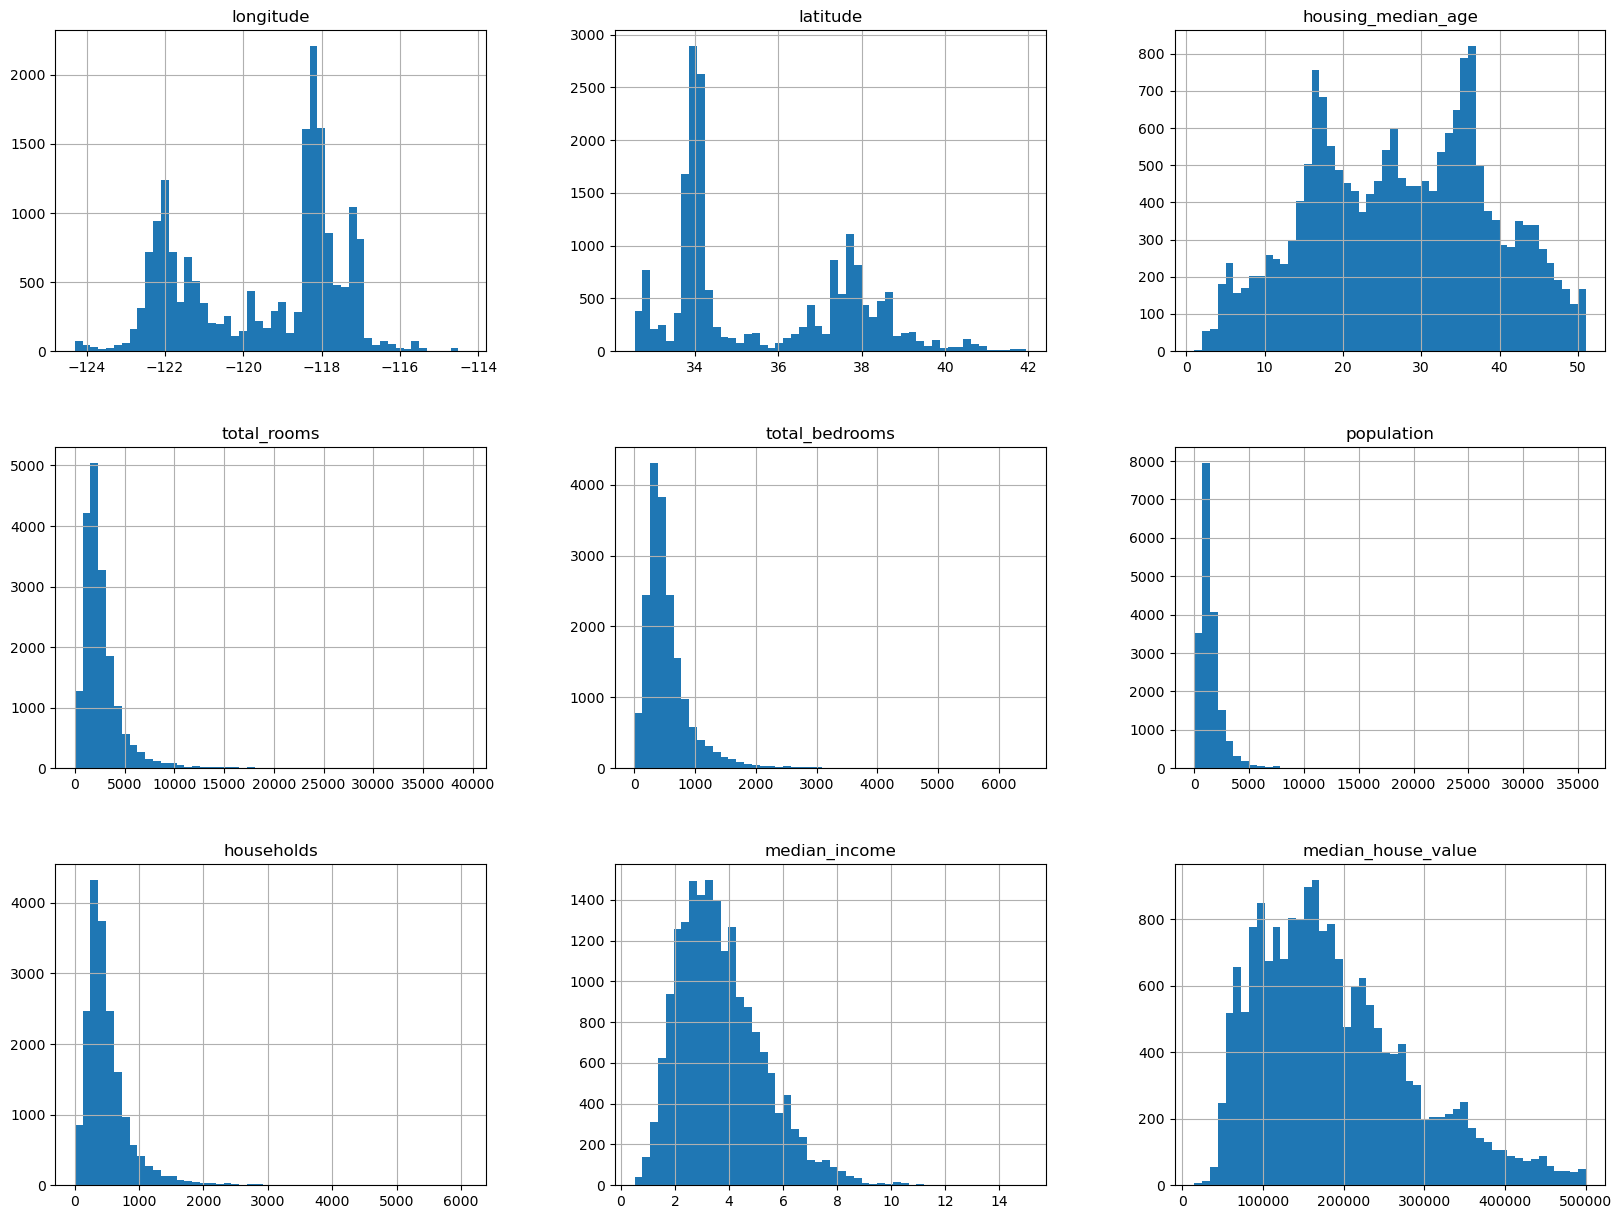

In [51]:
hist = housing_data.hist(bins=50, figsize=(20,15))
plt.show()

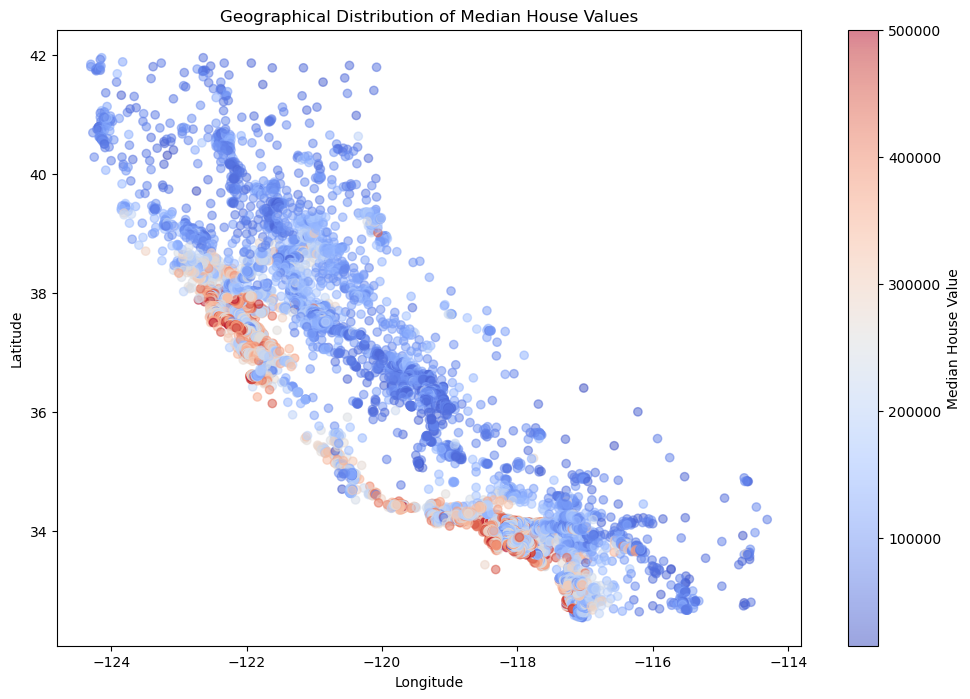

In [52]:
plt.figure(figsize=(12, 8))
plt.scatter(housing_data['longitude'], housing_data['latitude'], c=housing_data['median_house_value'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Median House Values')
plt.show()

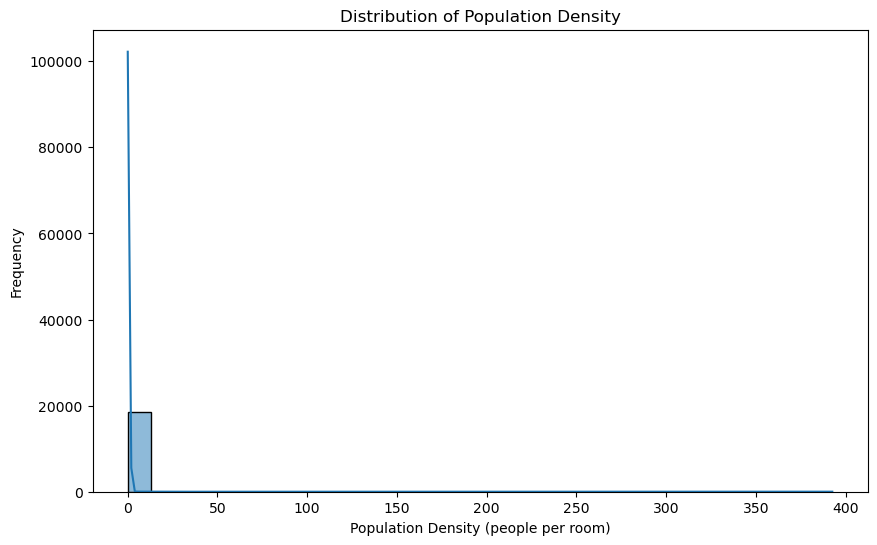

In [53]:
housing_data['population_density'] = housing_data['population'] / housing_data['total_rooms']

plt.figure(figsize=(10, 6))
sns.histplot(housing_data['population_density'], bins=30, kde=True)
plt.title('Distribution of Population Density')
plt.xlabel('Population Density (people per room)')
plt.ylabel('Frequency')
plt.show()



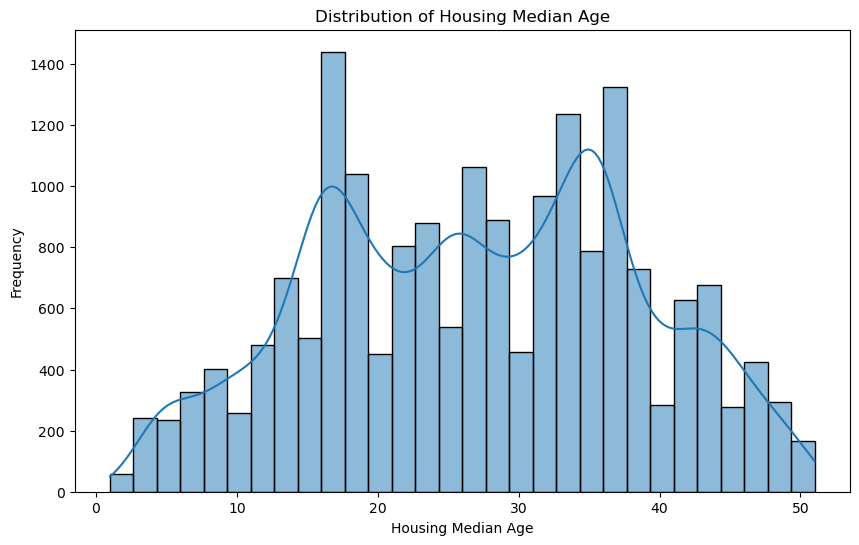

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['housing_median_age'], bins=30, kde=True)
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()
